# PCA 주성분 분석
다변량 차원 축소 

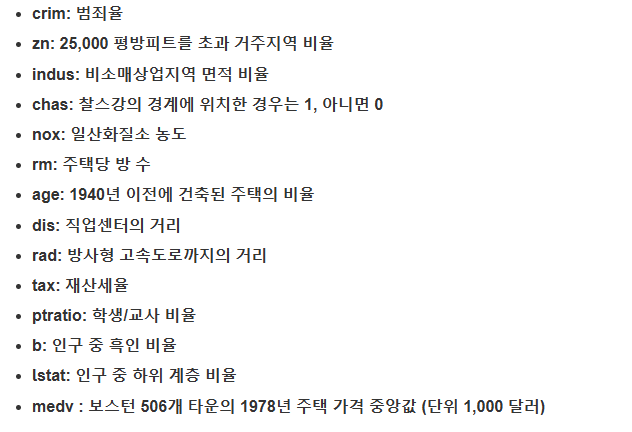

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [ ]:
df = pd.read_csv('./data/boston.csv')
df.head()

In [ ]:
df.info()

- 범주형 변수 제거

In [ ]:
del df['chas']
# 'Unnamed: 0' 도 제거
del df['Unnamed: 0']

In [ ]:
data = df.copy()


### 1. 가설 세우기 (인사이트 발견)
- 1. 범죄율이 높은 곳의 집값은 낮을까?
- 2. 방의 개수가 많은 곳의 집값은 높을까?
- 3. 일산화질소 농도가 높을수록 집값은?
- 4. 재산세율이과 집값의 관계는?

- 1. 범죄율 관계성 분석

In [ ]:
sns.jointplot(x='crim', y='medv', data=data, kind='reg')

- 공분산

In [ ]:
print(data['crim'].cov(data['medv']))
print(data['crim'].corr(data['medv']))

- 2. 방의 개수 분석

- 3. 일산화질소 분석

- 4. 재산세율 분석

- 모든 데이터의 상관계수 알기 - heatmap

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

### 2. 상관관계 비교하여 몇개의 변수를 몇개로 줄일 것인지 결정 하는 사례

In [ ]:
corr_bar = []

for column in data.columns:
    print(f"{column}과 집값의 상관관계 : {data[column].corr(data['medv'])}")
    corr_bar.append(abs(data[column].corr(data['medv'])))

In [ ]:
corr_bar

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x = data.columns, y=corr_bar)

In [ ]:
x = data[['dis', 'black']]

In [ ]:
x.head()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1)
pca.fit(x)

In [ ]:
# 각 변수의 분산 확인
pca.components_

In [ ]:
data['pc1'].corr(data['medv'])

In [ ]:
data['pc1'] = pca.transform(x)

In [ ]:
data

In [ ]:
sns.jointplot(data=data, x='pc1', y='medv', kind='reg')

### 3. 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
scaler_x = scaler.transform(x)

In [ ]:
scaler_x

In [ ]:
# 정규화된 데이터롤 pca 실행

# 변수 1개로 설정 
pca = PCA(n_components=1)
# 데이터를 학습
pca.fit(scaler_x)
# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인
pca.components_

In [ ]:
data['pc1'] = pca.transform(scaler_x)

In [ ]:
sns.jointplot(data=data, x=data['pc1'], y=data['medv'], kind='reg')

In [ ]:
data['pc1'].corr(data['medv'])

In [ ]:
data['black'].corr(data['medv'])

In [ ]:
data['dis'].corr(data['medv'])

### 4. 다변량 차원 축소

In [ ]:
data_r = df.iloc[:, :-1]

In [ ]:
scaler.fit(data_r)
scaler_x = scaler.transform(data_r)

In [ ]:
pca = PCA(n_components = 2)
pca.fit(scaler_x)

In [ ]:
data2 = pd.DataFrame(data = pca.transform(scaler_x), columns=['pc1', 'pc2'])

In [ ]:
data2.head()

In [ ]:
data_r = pd.concat([df, data2], axis=1)

In [ ]:
data_r 


In [ ]:
sns.scatterplot(x='pc1', y='pc2', hue='medv', data=data_r)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]  # 'medv' 제외
X.columns = ['범죄율', '주택지', '농지면적', '일산화질소', '방의 개수', '1940년 이전에 건설', '센터와의 거리', '접근성', '재산세율', '학생 교사 비율', '흑인비율', '빈곤층비율']

# 스케일링 필수 (PCA는 분산 기반이므로)
X_scaled = StandardScaler().fit_transform(X)

# PCA 2개 컴포넌트
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 주성분 로딩 (변수 기여도)
loadings = pd.DataFrame(pca.components_.T,  # 행: 변수 / 열: PC1, PC2
                        columns=['PC1', 'PC2'],
                        index=X.columns)



In [ ]:
X

In [ ]:
# ▶️ 로딩 플롯 그리기
plt.figure(figsize=(6,6))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
for var in loadings.index:
    plt.arrow(0, 0, loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'],
              head_width=0.03, color='blue')
    plt.text(loadings.loc[var, 'PC1']*1.1, loadings.loc[var, 'PC2']*1.1,
             var, color='red')

plt.title("Loading Plot (변수 기여도)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()